### change layout

In [29]:
import pandas as pd

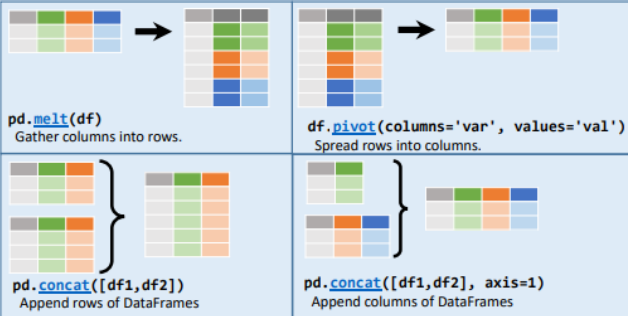

### df.melt(id_vars='',var_name='',value_name='')

Here is a dataFrame that represents sales data for different products and you want to reshape it using the melt() function

In [30]:
# Create a sample DataFrame of sales data
data = {
    'Product': ['Product A', 'Product B', 'Product C'],
    'Jan_Sales': [100, 150, 200],
    'Feb_Sales': [120, 160, 180],
    'Mar_Sales': [110, 140, 190]
}
df = pd.DataFrame(data)
print(df.shape)
df

(3, 4)


,Product,Jan_Sales,Feb_Sales,Mar_Sales
0,Product A,100,120,110
1,Product B,150,160,140
2,Product C,200,180,190


The original DataFrame has each month's sales represented as separate columns. We want to reshape the data so that each row represents a unique combination of product, month, and sales value

In [31]:
# Reshape the DataFrame using melt()
df_melted = df.melt(id_vars='Product', var_name='Month', value_name='Sales')
print(df_melted.shape)
df_melted

(9, 3)


,Product,Month,Sales
0,Product A,Jan_Sales,100
1,Product B,Jan_Sales,150
2,Product C,Jan_Sales,200
3,Product A,Feb_Sales,120
4,Product B,Feb_Sales,160
5,Product C,Feb_Sales,180
6,Product A,Mar_Sales,110
7,Product B,Mar_Sales,140
8,Product C,Mar_Sales,190


- melt() : converts columns into rows or, convert multiple columns into single column
- id_vars represents column which should remain as major identifier

This helps in further analysis of sales data using grouping

All rows first column values,
All rows 2nd column values,
...

### pivot : spread rows into columns

### df.pivot(index='',columns='',values='')

In [32]:
df_melted

,Product,Month,Sales
0,Product A,Jan_Sales,100
1,Product B,Jan_Sales,150
2,Product C,Jan_Sales,200
3,Product A,Feb_Sales,120
4,Product B,Feb_Sales,160
5,Product C,Feb_Sales,180
6,Product A,Mar_Sales,110
7,Product B,Mar_Sales,140
8,Product C,Mar_Sales,190


In [33]:
df_pivoted = df_melted.pivot(index='Product', columns='Month', values='Sales')
df_pivoted

Month,Feb_Sales,Jan_Sales,Mar_Sales
Product,,,
Product A,120,100,110
Product B,160,150,140
Product C,180,200,190


### pd.concat([df1,df2],axis=0)

In [34]:
# Sample customer datasets
data1 = {
    'CustomerID': [1, 2, 3],
    'Name': ['John', 'Alice', 'Bob'],
    'Age': [30, 25, 35]
}
data2 = {
    'CustomerID': [4, 5, 6],
    'Name': ['Emma', 'David', 'Sophia'],
    'Age': [28, 32, 27]
}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [35]:
df1

,CustomerID,Name,Age
0,1,John,30
1,2,Alice,25
2,3,Bob,35


In [36]:
df2

,CustomerID,Name,Age
0,4,Emma,28
1,5,David,32
2,6,Sophia,27


**append rows to dataframe**

In [37]:
con_rows = pd.concat([df1,df2])
con_rows

,CustomerID,Name,Age
0,1,John,30
1,2,Alice,25
2,3,Bob,35
0,4,Emma,28
1,5,David,32
2,6,Sophia,27


**append columns to dataframe**

### pd.concat([df1,df2],axis=1)

In [38]:
con_col = pd.concat([df1,df2],axis=1)
con_col

,CustomerID,Name,Age,CustomerID,Name,Age
0,1,John,30,4,Emma,28
1,2,Alice,25,5,David,32
2,3,Bob,35,6,Sophia,27


Concatenating along rows (axis=0): This is often used when you have multiple DataFrames representing similar data but from different sources or time periods. For example, if you have customer data from different regions or time periods, you can concatenate them along rows to create a consolidated dataset.

Concatenating along columns (axis=1): This is useful when you have related information split across multiple DataFrames and you want to combine them into a single DataFrame. For example, if you have customer data with basic information in one DataFrame and additional details (such as purchase history) in another DataFrame, you can concatenate them along columns to create a comprehensive customer dataset.

### method chaining

### pd.melt(df,id_vars='').rename(columns={'variable': 'names', 'value': 'values'}).query('condition')

In [39]:
data = {
    'ID': [1, 2, 3],
    'A': [100, 200, 300],
    'B': [150, 250, 350],
    'C': [200, 300, 400]
}

df = pd.DataFrame(data)
df

,ID,A,B,C
0,1,100,150,200
1,2,200,250,300
2,3,300,350,400


In [40]:
pd.melt(df,id_vars='ID')

,ID,variable,value
0,1,A,100
1,2,A,200
2,3,A,300
3,1,B,150
4,2,B,250
5,3,B,350
6,1,C,200
7,2,C,300
8,3,C,400


In [41]:
df = (pd.melt(df,id_vars='ID')
       .rename(columns={'variable': 'names', 'value': 'values'})
       .query('values >= 200'))
df

,ID,names,values
1,2,A,200
2,3,A,300
4,2,B,250
5,3,B,350
6,1,C,200
7,2,C,300
8,3,C,400
